Multiple Linear Regression 

In [1]:
print('Hi This Model is for multiple linear regression')

Hi This Model is for multiple linear regression


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv('ip.csv')

In [4]:
df_index

,year,month,interest_rate,unemployment_rate,index_price
0,2017,1,3.75,4.8,2278.87
1,2017,2,3.75,4.7,2363.64
2,2017,3,3.75,4.5,2362.72
3,2017,4,3.75,4.4,2384.20
4,2017,5,3.75,4.3,2411.80
...,...,...,...,...,...
91,2024,8,5.00,5.9,6925.31
92,2024,9,5.00,5.9,6987.41
93,2024,10,5.00,5.9,7041.18
94,2024,11,5.00,6.0,7093.28


In [5]:
df_index.drop(['year','month'],axis=1,inplace=True)


In [6]:
df_index

,interest_rate,unemployment_rate,index_price
0,3.75,4.8,2278.87
1,3.75,4.7,2363.64
2,3.75,4.5,2362.72
3,3.75,4.4,2384.20
4,3.75,4.3,2411.80
...,...,...,...
91,5.00,5.9,6925.31
92,5.00,5.9,6987.41
93,5.00,5.9,7041.18
94,5.00,6.0,7093.28


In [8]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

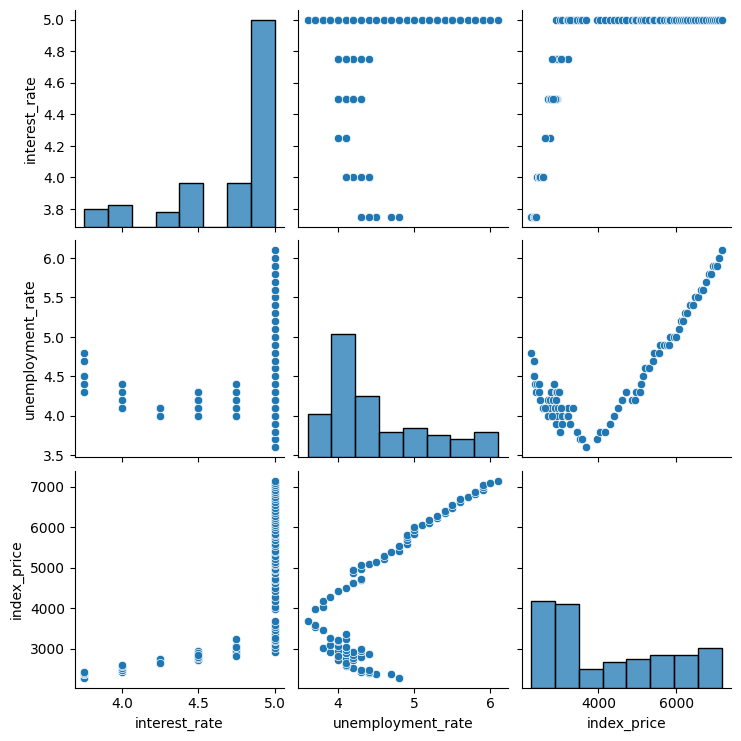

In [9]:
import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.256426,0.682927
unemployment_rate,0.256426,1.000000,0.828790
index_price,0.682927,0.828790,1.000000


Text(0, 0.5, 'unemployment_rate')

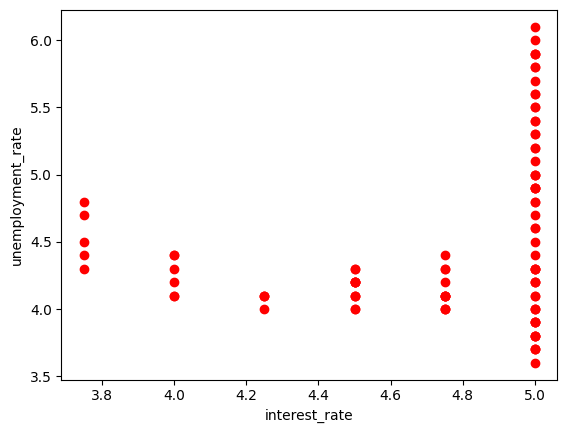

In [12]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [13]:
X=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

<Axes: xlabel='interest_rate', ylabel='index_price'>

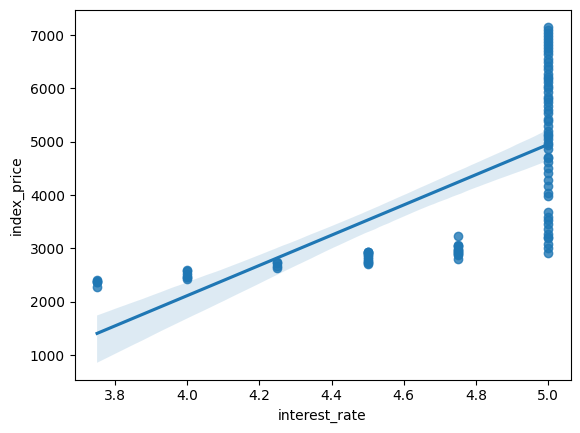

In [17]:
sns.regplot(x='interest_rate',y='index_price',data=df_index)

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [20]:
X_train

array([[ 6.40444761e-01, -9.14897861e-01],
       [ 6.40444761e-01, -1.21915950e+00],
       [-2.15422329e+00, -3.06374572e-01],
       [ 6.40444761e-01,  2.43198023e+00],
       [ 6.40444761e-01,  1.21493365e+00],
       [ 6.40444761e-01,  7.58541182e-01],
       [ 6.40444761e-01, -4.58505394e-01],
       [ 6.40444761e-01,  1.06280283e+00],
       [ 6.40444761e-01,  1.51919529e+00],
       [ 6.40444761e-01,  2.12771858e+00],
       [ 6.40444761e-01, -1.06702868e+00],
       [-5.82222510e-02, -3.06374572e-01],
       [-7.56889263e-01, -4.58505394e-01],
       [ 6.40444761e-01, -4.58505394e-01],
       [ 6.40444761e-01, -1.54243750e-01],
       [ 6.40444761e-01,  6.06410360e-01],
       [-2.85289030e+00,  3.02148716e-01],
       [ 6.40444761e-01, -3.06374572e-01],
       [ 6.40444761e-01, -7.62767038e-01],
       [ 6.40444761e-01, -9.14897861e-01],
       [-2.85289030e+00, -3.06374572e-01],
       [-7.56889263e-01, -7.62767038e-01],
       [-7.56889263e-01, -4.58505394e-01],
       [ 6.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
from sklearn.model_selection import cross_val_score
validation= cross_val_score(estimator=regression,X=X_train,y=y_train,cv=6,scoring='neg_mean_squared_error')

In [25]:
validation.mean()

-202392.59132653548

In [26]:
y_pred=regression.predict(X_test)
y_pred

array([3235.11198327, 6893.94055495, 2532.41469087, 3916.26775888,
       5405.10415692, 6468.55872694, 3235.11198327, 6255.86781294,
       3703.57684488, 4979.72232891, 3490.88593087, 7319.32238296,
       5617.79507092, 2362.80681046, 2766.64712167, 3894.72624208,
       3022.42106927, 3447.80289728, 3469.34441407, 2341.26529366,
       3916.26775888, 4341.64958689, 2319.72377686, 7106.63146896])

In [27]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('mse = ',mse)
print('mae = ',mae)
print('rmse = ',rmse)

mse =  217772.80604699146
mae =  397.2188145075609
rmse =  466.66133978185024


In [28]:
score = r2_score(y_test,y_pred)
print('r2 score = ',score)


r2 score =  0.9081552011223208


In [30]:
ad_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 score = ',ad_score)

adjusted r2 score =  0.8994080774196848


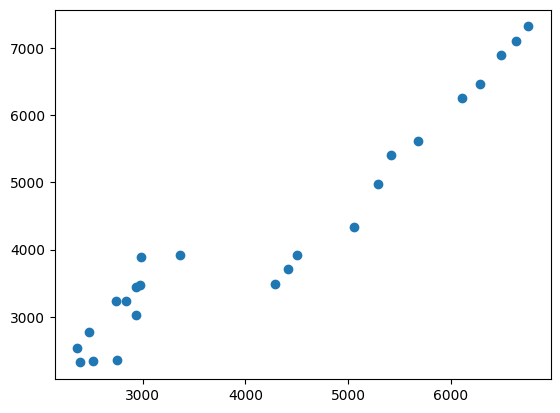

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
residuals = y_test - y_pred
print(residuals)

26   -400.711983
84   -406.850555
2    -169.694691
55    585.172241
68     15.455843
81   -189.368727
16   -497.581983
78   -143.677813
54    708.313155
66    310.557671
53    796.094069
88   -564.932383
71     61.374929
13    387.973190
7    -294.997122
30   -912.516242
22    -90.191069
24   -518.932897
33   -497.044414
8     178.094706
43   -554.597759
62    715.220413
3      64.476223
86   -469.421469
Name: index_price, dtype: float64


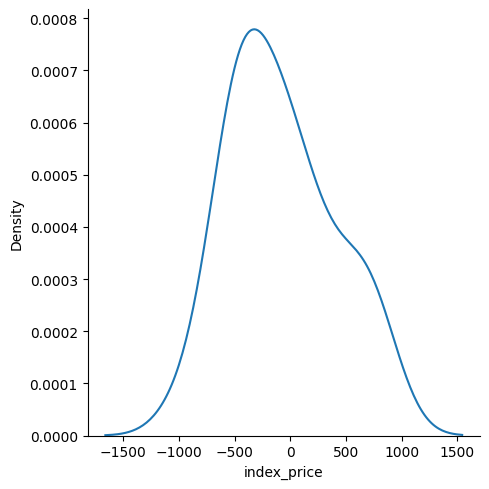

In [33]:
sns.displot(residuals,kind='kde')

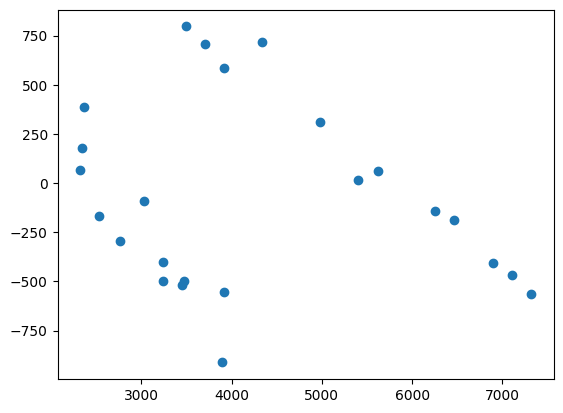

In [34]:

plt.scatter(y_pred,residuals)

In [35]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.111
Model:                            OLS   Adj. R-squared (uncentered):              0.086
Method:                 Least Squares   F-statistic:                              4.390
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                      0.0160
Time:                        18:42:17   Log-Likelihood:                         -704.11
No. Observations:                  72   AIC:                                      1412.
Df Residuals:                      70   BIC:                                      1417.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           757.5666    525.920      1.440      0.154    -291.347    1806.480
x2          1142.8701    525.920      2.173      0.033      93.957    2191.784
==============================================================================
Omnibus:                        2.970   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.521
Skew:                          -0.346   Prob(JB):                        0.284
Kurtosis:                       2.399   Cond. No.                         1.27
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(regression.coef_)

[ 757.5665629  1142.87011808]
